## 경사법

앞서 본 기록을 통해 현재 매개변수 값에 대한 손실함수의 기울기를 구해, 손실함수 값이 최소가 되는 방향으로 매개변수를 업데이트함을 배웠다.  
사실 이것이 바로 경사법이다. 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고, 이동한 장소에서 또 기울기를 구하고 이동함을 반복하는 방법이다.

책에는 간략하게 나온 내용이며, 지금 당장 필요한가 싶은 내용이지만,  
경사법이 100%로 손실함수 값을 최적으로 최소가 되도록 만든다는 보장은 없다. 매개변수 수가 엄청나게 많으며 손실함수가 복잡하기 때문에 최소값이 되는(기울기가 0이되는) 최적의 지역을 찾는 것이 쉽지 않다.

<img src="img/deep_learning_images/local_vs_global.png" width=320 height=320>  

> 위 그림에서 local minima라고 표기된 지역에서 기울기는 0이 되지만, 실제로는 global minima라는 손실 함수 값이 더 최소가 되는 지역이 존재함.


## Learning Rate
<img src="img/deep_learning_images/e_4.7.png" height=224 width=224>

기호 $\eta$(에타)는 갱신하는 양을 나타내는 것으로, 이를 신경망 학습에서는 학습률-Learning Rate라고 한다.  
한 번의 학습으로 매개변수 값을 얼마나 갱신하느냐를 의미.

위 식은 1회에 해당하는 갱신을 수식으로 나타낸 것으로 이를 여러 번 반복하면서 서서히 손실 함수의 값을 줄인다.  
학습률은 0.01이나 0.001 등 미리 특정한 값으로 정해두어야하며, 값이 너무 크거나 작으면 최적의 장소를 찾아갈 수 없다.

### 참고 -  하이퍼 파라미터
학습률과 같은 매개변수를 하이퍼파라미터라고 하는데, 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수이다.  
신경망의 가중치 매개변수는 학습 과정에서 자동으로 확득되는 매개변수인 반면, 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수를 뜻함.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient
from functions import cross_entropy_error, softmax

In [2]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [3]:
def function_2(x):
    return x[0]**2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

초기값 (-3.0, 4.0)으로 설정하고 경사법을 사용해 최솟값 탐색을 진행한다. 결과 값은 -6.11110793e-10,  8.14814391e-10로 거의 (0, 0)에 가까운 결과다.

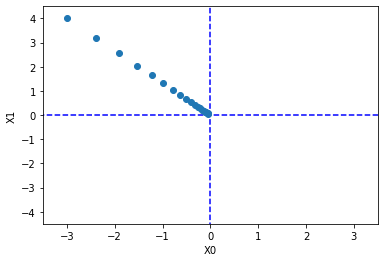

In [4]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 신경망의 기울기
4-2와 4-3에서 본 내용들을 종합해서 신경망에서 기울기를 구해보자.  
수차례 언급했지만 신경망의 기울기는 가중치 매개변수$(x)$에 대한 손실함수$(f(x))$의 기울기를 구하는 것이다.

<img src="img/deep_learning_images/e_4.8.png" width=224 height=224>
$W$는 가중치, $L$이 손실함수라고 하면, $\frac {\partial L}{\partial W}$로 표기할 수 있고, 이는 각각의 원소에 대한 손실함수의 편미분을 의미한다.  

(1행 1번째 원소인 $\frac {\partial w_{11}}{\partial L}$은 $w_{11}$을 조금 변경했을 때 손실함수 L이 얼마나 변화하느냐를 의미.)

In [5]:
class simpleNet:
    def __init__(self):
        # self.W = np.random.randn(2, 3)
        self.W = np.array([[0.47355232, 0.9977393, 0.84668094], [0.85557411, 0.03563661, 0.69422093]])
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [6]:
net = simpleNet()
print(net.W)

[[0.47355232 0.9977393  0.84668094]
 [0.85557411 0.03563661 0.69422093]]


In [7]:
x = np.array([0.6, 0.9])

In [8]:
p = net.predict(x)
print(p)

[1.05414809 0.63071653 1.1328074 ]


In [9]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.9280682857864075

- 입력값 $x = [0.6, 0.9]$
- predict는 입력값과 가중치의 행렬 곱연산
- loss는 입력값과 가중치 곱연산 결과에 softmax를 적용하고, 실제 정답과 예측간의 오차를 구해 반환

In [10]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.21924757  0.14356243 -0.36281   ]
 [ 0.32887136  0.21534364 -0.544215  ]]


numerical_gradient 함수를 통해 입력값과 가중치를 곱한 값이 실제 데이터와 얼만큼의 차이를 보이는지 loss를 구한 다음, 이에 대한 편미분 연산을 한다.  
위 결과를 예로 들면, 

- $\frac {\partial L}{\partial W}$의 $\frac {\partial L}{\partial W_{11}}$은 대략 0.2로 $w_{11}$을 h만큼 늘리면 손실 함수 값은 0.2h만큼 증가한다는 뜻. 
- $\frac {\partial L}{\partial W_{23}}$ 은 -0.5이므로 $\frac {\partial L}{\partial W_{23}}$을 h만큼 늘리면 손실 함수 값은 0.5h만큼 감소한다.
- 따라서 손실 함수 값을 줄인다는 목표를 이루려면 $\frac {\partial L}{\partial W_{11}}$ 은 음의 방향으로, $\frac {\partial L}{\partial W_{23}}$은 양의 방향으로 갱신해야 함을 알 수 있다.